# Health risk analysis

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from pandas import read_excel
from scipy import stats
from scipy.stats import spearmanr

## Model parameters

In [2]:
df = pd.read_pickle('../estimation/output/params_ref_us.pkl')
pars = df.loc[:,'value'].to_frame()
pars.columns = ['us']
countries = ['de','dk','fr','it','nl','se','sp','us']
for c in countries:
    df = pd.read_pickle('../estimation/output/params_ref_'+c+'.pkl')
    pars[c] = df.loc[:,'value']
pars = pars[countries]
pars

,de,dk,fr,it,nl,se,sp,us
name,,,,,,,,
sigma,2.097183,2.097183,2.097183,2.097183,2.097183,2.097183,2.097183,2.097183
beta,0.970000,0.970000,0.970000,0.970000,0.970000,0.970000,0.970000,0.970000
phi,0.304140,0.304140,0.304140,0.304140,0.304140,0.304140,0.304140,0.304140
psi,0.168902,0.168902,0.168902,0.168902,0.168902,0.168902,0.168902,0.168902
delta_h1,-1.296156,-1.601068,-1.094451,-0.715889,-1.264525,-1.525023,-0.005673,-0.967380
delta_h2,3.953905,4.273184,3.697940,3.867593,3.998342,4.310607,3.394047,3.478244
eta,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
tfp,1.008961,1.255176,0.923597,0.638877,1.009820,0.788306,0.810865,1.000000
price,0.846861,0.887615,0.614844,0.712935,0.698165,0.843816,0.650287,1.000000


## Simulated Moments

In [3]:
# loading results from estimation
momsim = pd.read_pickle('output/moms_sim.pkl')
momsim

,cshare,mshare,gb,gg,h,g_q2,g_q3,g_q4,tfp
US,0.683222,0.142521,0.227541,0.969140,0.880597,1.142220,1.231196,1.301280,1.000000
DE,0.747475,0.102762,0.488755,0.980820,0.962245,1.022251,1.037385,1.046837,0.823013
DK,0.776568,0.088634,0.427615,0.986063,0.968432,1.014438,1.025553,1.035745,0.900990
FR,0.769039,0.108333,0.500298,0.975226,0.952821,1.057299,1.082895,1.087157,0.732520
IT,0.710800,0.081824,0.272530,0.979091,0.928765,1.036969,1.066782,1.100864,0.733720
NL,0.750653,0.081014,0.641872,0.981654,0.972211,1.021743,1.029750,1.031810,0.870789
SE,0.716410,0.086997,0.384000,0.986575,0.966213,1.006930,1.012854,1.020789,0.790343
SP,0.766439,0.074915,0.433196,0.966427,0.928078,1.103412,1.127606,1.138246,0.643379


# DALYs 
## Data from: Global Burden of Disease Collaborative Network. 
### Global Burden of Disease Study 2017 (GBD 2017) Results. 
Seattle, United States: Institute for Health Metrics and Evaluation (IHME), 2018.


### DALY: Definition

One DALY can be thought of as one lost year of "healthy" life. The sum of these DALYs across the population, or the burden of disease, can be thought of as a measurement of the gap between current health status and an ideal health situation where the entire population lives to an advanced age, free of disease and disability.

DALYs for a disease or health condition are calculated as the sum of the Years of Life Lost (YLL) due to premature mortality in the population and the Years Lost due to Disability (YLD) for people living with the health condition or its consequences

### DALY: calculation

DALYs for a disease or health condition are calculated as the sum of the Years of Life Lost (YLL) due to premature mortality in the population and the Years Lost due to Disability (YLD) for people living with the health condition or its consequences:
Calculation
$$
DALY = YLL + YLD 
$$
with  

1/ $YLL = N \times L$  where $N = $ number of deaths $L =$ standard life expectancy at age of death in years, 

2/ $YLD = P \times DW$ where $P =$ number of prevalent cases and $DW =$ disability weight

### Interpretation

The DALYs give an indicator on the probability to be in bad health or to die, and this for each risky behavior. Thus DALYs can be related  to the probability to remain in bad health, being previouly in bad health because DALYs account for the number of  lost years in good health.

In [4]:
file_name = '../data_sources/xlsx_files/DALY_my_sample.xlsx'
my_sheet  = 'Feuil2000'    # sheet name
data_daly2000 = read_excel(file_name, sheet_name = my_sheet)
my_sheet  = 'Feuil2017'    # sheet name
data_daly2017 = read_excel(file_name, sheet_name = my_sheet)

In [5]:
name_col0 = ['Unnamed: 0',
            'Air pollution (outdoor & indoor)\nDALYs','Child wasting\nDALYs','Child stunting\nDALYs',
            'Secondhand smoke\nDALYs','Unsafe sanitation\nDALYs','Unsafe water source\nDALYs',
            'Low physical activity\nDALYs',
            'High cholesterol\nDALYs','Non-exclusive breastfeeding\nDALYs',
            'Outdoor air pollution\nDALYs','Indoor air pollution\nDALYs',
            'Drug use\nDALYs','Diet low in fruits\nDALYs',
            'Iron deficiency\nDALYs','Zinc deficiency\nDALYs','Diet high in salt\nDALYs',
            'Diet low in vegetables\nDALYs','Vitamin A deficiency\nDALYs','Smoking\nDALYs',
            'High blood pressure\nDALYs','High blood sugar\nDALYs','Obesity\nDALYs',
            'Total'] 

name_col = ['Air pollution (outdoor & indoor)\nDALYs','Child wasting\nDALYs','Child stunting\nDALYs',
            'Secondhand smoke\nDALYs','Unsafe sanitation\nDALYs','Unsafe water source\nDALYs',
            'Low physical activity\nDALYs',
            'High cholesterol\nDALYs','Non-exclusive breastfeeding\nDALYs',
            'Outdoor air pollution\nDALYs','Indoor air pollution\nDALYs',
            'Drug use\nDALYs','Diet low in fruits\nDALYs',
            'Iron deficiency\nDALYs','Zinc deficiency\nDALYs','Diet high in salt\nDALYs',
            'Diet low in vegetables\nDALYs','Vitamin A deficiency\nDALYs','Smoking\nDALYs',
            'High blood pressure\nDALYs','High blood sugar\nDALYs','Obesity\nDALYs',
            'Total'] 

### Population size 2005 (Million)

In [6]:
# 2005
PopL2005 = np.array([81.60, 5.42, 61.12, 58.28, 16.37, 9.04, 44.02, 294.99])
PopL2000 = np.array([81.40, 5.34, 59.02, 56.69, 15.93, 8.88, 40.83, 281.71])
PopL2017 = np.array([82.66, 5.73, 64.84, 60.67, 17.02, 9.90, 46.65, 325.08])

### Data DALYs per inhabitant

In [7]:
countries = ['de','dk','fr','it','nl','se','sp','us']

daly2017 = pd.DataFrame(index=countries,columns=name_col)
for ii in range(23): #23
    yy = name_col0[ii+1]
    for jj in range(8):
        cc = countries[jj]
        daly2017.loc[cc,yy] = data_daly2017.loc[jj,yy]/(PopL2017[jj]*1000000)

daly2000 = pd.DataFrame(index=countries,columns=name_col)
for ii in range(23): #23
    yy = name_col0[ii+1]
    for jj in range(8):
        cc = countries[jj]
        daly2000.loc[cc,yy] = data_daly2000.loc[jj,yy]/(PopL2000[jj]*1000000)

daly_mean = (daly2000+daly2017)/2

tables_daly = pd.DataFrame(index=name_col,columns=countries)
for cc in range(8):
    tt = countries[cc]
    tables_daly.loc[:,tt] = daly_mean.loc[tt,name_col[0:23]]

tables_daly_us = pd.DataFrame(index=name_col,columns=countries)
tables_daly_us = tables_daly.sort_values('us',ascending=False)

In [8]:
name_s   = ['Smoking','Obesity','Diet', 'Drug','Pollution','Phys. Act.','Total']
tables_s = pd.DataFrame(index=name_s,columns=countries)
for cc in range(8):
    tt = countries[cc]
    tables_s.loc['Smoking',tt]    = tables_daly_us.loc[tables_daly_us.index[1],tt]
    tables_s.loc['Obesity',tt]    = tables_daly_us.loc[tables_daly_us.index[2],tt]
    tables_s.loc['Diet',tt]       = tables_daly_us.loc[tables_daly_us.index[9],tt] + tables_daly_us.loc[tables_daly_us.index[10],tt] + tables_daly_us.loc[tables_daly_us.index[11],tt]
    tables_s.loc['Drug',tt]       = tables_daly_us.loc[tables_daly_us.index[5],tt]
    tables_s.loc['Pollution',tt]  = tables_daly_us.loc[tables_daly_us.index[7],tt]
    tables_s.loc['Phys. Act.',tt] = tables_daly_us.loc[tables_daly_us.index[12],tt]    
    tables_s.loc['Total',tt]      = tables_s.loc['Smoking',tt] + tables_s.loc['Obesity',tt] + tables_s.loc['Diet',tt] + tables_s.loc['Drug',tt] + tables_s.loc['Pollution',tt] + tables_s.loc['Phys. Act.',tt]
tables_s

,de,dk,fr,it,nl,se,sp,us
Smoking,0.044274,0.052392,0.032866,0.036667,0.046289,0.033835,0.037064,0.036666
Obesity,0.026268,0.021374,0.016101,0.021992,0.019666,0.021249,0.011303,0.032754
Diet,0.016163,0.011432,0.010585,0.011232,0.009962,0.016481,0.008656,0.016017
Drug,0.003797,0.004668,0.003723,0.002833,0.002628,0.003397,0.004055,0.0158
Pollution,0.010275,0.009832,0.006065,0.009504,0.009459,0.00554,0.00748,0.008198
Phys. Act.,0.005044,0.004065,0.002907,0.004079,0.003228,0.004911,0.003388,0.004131
Total,0.105822,0.103764,0.072245,0.086306,0.091232,0.085412,0.071945,0.113567


### Figures where the cost of each risky behaviors is measured as the number of lost years 

In [9]:
names_s = ['','Smoking','Obesity','Diet', 'Drug','Pollution','Phys. Act.']

In [10]:
xxx = np.arange(len(name_s[0:-1]))
www = 0.1

In [11]:
x = np.arange(len(countries))
countries_plot = ['','de','dk','fr','it','nl','se','sp','us']

<ipython-input-12-5368ea6c9767>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names_ss)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


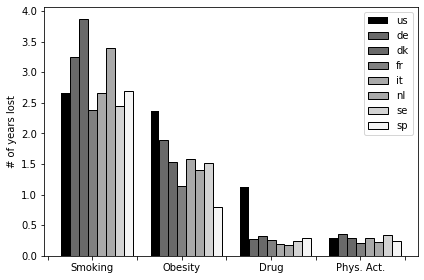

In [12]:
names_ss = ['','','Smoking','', 'Obesity','', 'Drug','', 'Phys. Act.']
xxxs = np.arange(4)
fig, ax = plt.subplots()
ax.bar(xxxs-.3,70/(1-tables_s.loc[['Smoking','Obesity', 'Drug','Phys. Act.'],'us'])-70, width=www,color='black',label='us')
ax.bar(xxxs-.2,70/(1-tables_s.loc[['Smoking','Obesity', 'Drug','Phys. Act.'],'de'])-70, width=www,color='dimgrey'  ,edgecolor='black',label='de')
ax.bar(xxxs-.1,70/(1-tables_s.loc[['Smoking','Obesity', 'Drug','Phys. Act.'],'dk'])-70, width=www,color='dimgrey'  ,edgecolor='black',label='dk')
ax.bar(xxxs,   70/(1-tables_s.loc[['Smoking','Obesity', 'Drug','Phys. Act.'],'fr'])-70, width=www,color='grey'     ,edgecolor='black',label='fr')
ax.bar(xxxs+.1,70/(1-tables_s.loc[['Smoking','Obesity', 'Drug','Phys. Act.'],'it'])-70, width=www,color='darkgrey' ,edgecolor='black',label='it')
ax.bar(xxxs+.2,70/(1-tables_s.loc[['Smoking','Obesity', 'Drug','Phys. Act.'],'nl'])-70, width=www,color='darkgrey' ,edgecolor='black',label='nl')
ax.bar(xxxs+.3,70/(1-tables_s.loc[['Smoking','Obesity', 'Drug','Phys. Act.'],'se'])-70, width=www,color='lightgrey',edgecolor='black',label='se')
ax.bar(xxxs+.4,70/(1-tables_s.loc[['Smoking','Obesity', 'Drug','Phys. Act.'],'sp'])-70, width=www,color='whitesmoke',edgecolor='black',label='sp')
ax.set_xticklabels(names_ss)
ax.set_ylabel('# of years lost')
ax.legend()
fig.tight_layout()
plt.savefig('../figures/fig_c2_DALYs_details.eps')
plt.show()

## Mesures of risky behaviors
These measures account for the intensity of risky behaviors in each country

In [13]:
# Data RF
nameRF = ['Obesity','Ever smoke','No Phys.Act']
dataRF = np.array([
[.1964254, .3598716, .0507653],
[.1657165,.4023989,.0276525],
[.1708216,.4925962,.0556293],
[.2764948,.3220845,.1037317],
[.1980363,.3579953,.1636622],
[.1970815,.3332759,.0886183],
[.1709308,.5265188,.0410328],
[.3286226,.5787106,.0994831]])
tableRF = pd.DataFrame(index=nameRF,columns=countries)
for cc in range(8):
    tt = countries[cc]
    tableRF.loc[:,tt] = dataRF[cc,:]
tableRF

,de,dk,fr,it,nl,se,sp,us
Obesity,0.196425,0.165716,0.170822,0.276495,0.198036,0.197081,0.170931,0.328623
Ever smoke,0.359872,0.402399,0.492596,0.322084,0.357995,0.333276,0.526519,0.578711
No Phys.Act,0.050765,0.027652,0.055629,0.103732,0.163662,0.088618,0.041033,0.099483


In [14]:
file_name = '../data_sources/xlsx_files/data_risky_alpha.xlsx'

my_sheet  = 'data2'    # sheet name
data_risk = read_excel(file_name, sheet_name = my_sheet)
data_risk

,country,Obesity,BMI,Child Obesity,Lack of support MA,Opioid,Alcohol,Smoking,Pollution,Fruit,...,Feeling of loneliness,one-person households,Friends,resid_alpha10,resid_alpha11,Insufficient Physical Activity 18+ Age-stand.,Insufficient Physical Activity 18+ crude,Insufficient Physical Activity 11-17 years,salt,Air pollution
0,DEU,0.600000,26.517273,0.287,6.0,9.546019,10.9,0.188,45.3,0.473,...,37,39.871429,92.0,-0.395350,0.047194,42.21,45.82,83.69,186.833333,14.114283
1,DNK,0.510000,25.586903,0.276,3.6,25.925264,9.1,0.169,30.4,0.522,...,25,44.530769,95.3,0.023180,0.239228,28.50,30.76,84.51,160.600000,10.759141
2,FRA,0.490000,25.916094,0.324,7.7,2.805005,11.7,0.254,25.2,0.551,...,45,34.350000,88.4,-0.475825,-0.107545,29.32,32.25,87.00,145.500000,12.493830
3,ITA,0.460000,26.307978,0.420,9.2,1.768456,7.6,0.199,48.7,0.758,...,47,30.466667,90.8,0.340060,-0.307232,41.39,44.81,88.62,190.675000,15.843478
4,NLD,0.473000,26.261133,0.269,4.8,4.404116,8.3,0.168,31.3,0.443,...,35,36.566667,90.1,0.083039,0.035529,27.18,29.45,80.17,171.600000,15.662882
5,SWE,0.482000,25.818920,0.252,6.6,55.029139,7.1,0.104,18.5,0.583,...,30,41.413333,91.8,0.035904,0.048471,23.13,25.22,84.67,141.391304,5.611160
6,SPA,0.545381,27.162832,0.379,6.6,NaN,8.6,0.221,27.1,0.840,...,40,23.692308,94.8,0.425570,-0.200892,26.81,29.57,76.61,178.900000,9.923726
7,USA,0.710000,27.602920,0.430,10.7,130.970941,8.9,0.105,24.1,0.584,...,30,22.738448,89.9,-0.036578,0.245248,40.01,42.53,72.05,195.391304,9.520327


In [15]:
name_x = ['country','Obesity','BMI','Child Obesity','Lack of support MA','Opioid','Alcohol','Smoking','Pollution',
 'Fruit','Vegetable','Fat diet','Sugar diet','Protein diet','Diabete','Daily calories','Preventive Care',
 'leukemia','breast','colon','rectal','lung','stomach','cervical','waiting',
 'Cannabis','Ecstasy','Amphetamines','Cocaine','Overdose (per 100 000)',
 'rain','temperature','sunshine',
 'Daily cigarettes (owid)','Ever smoked (hrs)',
 'Prevalence of alcohol disorder','Heavy episodic drinking','Lifetime abstainer','Abstrainer last year',
 'Beer consumption','Wine consumption','Spirit consumption','Alcool consumption (Owid)',
 'Anxiety','Depression','Bipolar','Eating Disorder','Schizophrenia','Mental and substance use disorder',
 'Feeling of loneliness','one-person households','Friends',
 'resid_alpha10','resid_alpha11',
 'Insufficient Physical Activity 18+ Age-stand.','Insufficient Physical Activity 18+ crude','Insufficient Physical Activity 11-17 years',
 'salt','Air pollution']

# Aggregation by group of risks
# Share of population that consumes a drug
# Data from FL
DrugL = np.array([0.600343, 0.040283,  0.620790, 0.750047, 0.132868, 0.050934, 0.581897, 8.03])
DrugFL = (DrugL/PopL2005)#*100
# bad diet: grammes per capita per day
DietFL = (data_risk.loc[:,'Sugar diet']/365)*1000 + data_risk.loc[:,'Protein diet'] + data_risk.loc[:,'Fat diet']
# Exposure to suspended particules in licrograms per cubic meter (\mu g/m^3)
PollFL = data_risk.loc[:,'Air pollution']

name_ss =['Obesity', 'Smoking', 'Phys. Act.', 'Drug', 'Diet', 'Pollution']
tableFL = pd.DataFrame(index=name_ss,columns=countries)
for cc in range(8):
    tt = countries[cc]
    for ii in range(3):
        nn = name_ss[ii]
        tableFL.loc[nn,tt] = dataRF[cc,ii]
    tableFL.loc[name_ss[3],tt] = DrugFL[cc]
    tableFL.loc[name_ss[4],tt] = DietFL[cc]
    tableFL.loc[name_ss[5],tt] = PollFL[cc]
tableFL

,de,dk,fr,it,nl,se,sp,us
Obesity,0.196425,0.165716,0.170822,0.276495,0.198036,0.197081,0.170931,0.328623
Smoking,0.359872,0.402399,0.492596,0.322084,0.357995,0.333276,0.526519,0.578711
Phys. Act.,0.050765,0.027652,0.055629,0.103732,0.163662,0.088618,0.041033,0.099483
Drug,0.007357,0.007432,0.010157,0.01287,0.008117,0.005634,0.013219,0.027221
Diet,376.081096,391.728219,381.142192,347.630137,368.220822,344.921918,336.990959,453.877808
Pollution,14.114283,10.759141,12.49383,15.843478,15.662882,5.61116,9.923726,9.520327


<ipython-input-16-2b0c94542f0a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(countries_plot)


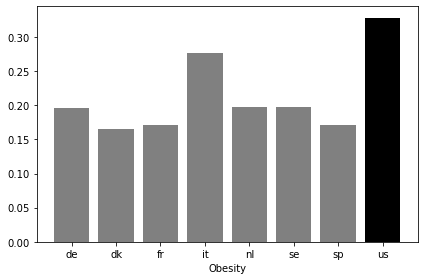

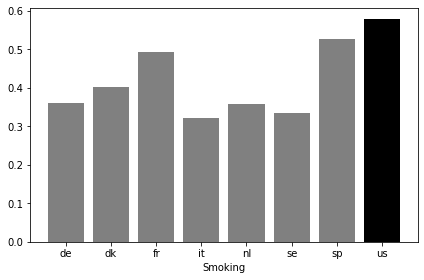

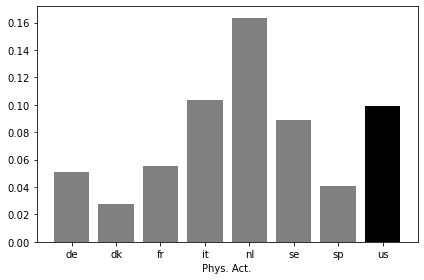

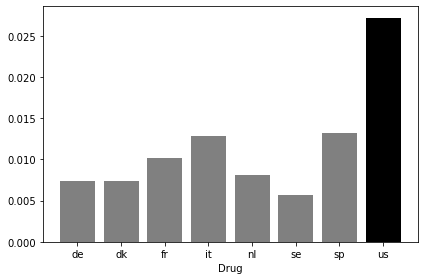

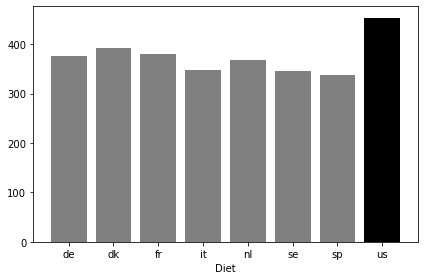

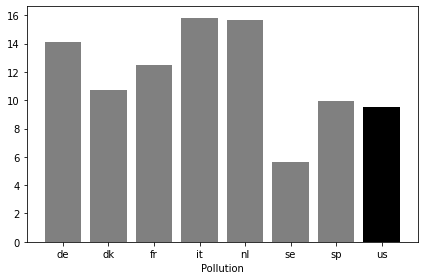

In [16]:
# Figures where the cost of each risky behaviors is measured as the number of lost years 
for cc in range(6):
    fig, ax = plt.subplots()
    clrs = ['grey' if xi < 7 else 'black' for xi in x ]
    ax.bar(x,tableFL.loc[name_ss[cc],:],color=clrs)#'grey')
    #ax.set_ylabel('# of years lost')
    ax.set_xlabel(name_ss[cc])
    ax.set_xticklabels(countries_plot)
    fig.tight_layout()
    plt.savefig('../figures/fig_c1_'+name_ss[cc]+'.eps')
    plt.show()

In [17]:
name_Thep  = ['IndexThep']
Index_Thep = pd.DataFrame(index=name_Thep,columns=countries)
Index_Thep.loc['IndexThep',:] = tableFL.loc['Obesity',:] + tableFL.loc['Smoking',:] + tableFL.loc['Phys. Act.',:] + tableFL.loc['Drug',:]#/100
Index_Thep

,de,dk,fr,it,nl,se,sp,us
IndexThep,0.614419,0.6032,0.729204,0.715181,0.72781,0.62461,0.751701,1.034038


In [18]:
IndexThep = [
tableFL.loc['Obesity','de'] + tableFL.loc['Smoking','de'] + tableFL.loc['Phys. Act.','de'] + tableFL.loc['Drug','de'],
tableFL.loc['Obesity','dk'] + tableFL.loc['Smoking','dk'] + tableFL.loc['Phys. Act.','dk'] + tableFL.loc['Drug','dk'],
tableFL.loc['Obesity','fr'] + tableFL.loc['Smoking','fr'] + tableFL.loc['Phys. Act.','fr'] + tableFL.loc['Drug','fr'],
tableFL.loc['Obesity','it'] + tableFL.loc['Smoking','it'] + tableFL.loc['Phys. Act.','it'] + tableFL.loc['Drug','it'],
tableFL.loc['Obesity','nl'] + tableFL.loc['Smoking','nl'] + tableFL.loc['Phys. Act.','nl'] + tableFL.loc['Drug','nl'],
tableFL.loc['Obesity','se'] + tableFL.loc['Smoking','se'] + tableFL.loc['Phys. Act.','se'] + tableFL.loc['Drug','se'],
tableFL.loc['Obesity','sp'] + tableFL.loc['Smoking','sp'] + tableFL.loc['Phys. Act.','sp'] + tableFL.loc['Drug','sp'],
tableFL.loc['Obesity','us'] + tableFL.loc['Smoking','us'] + tableFL.loc['Phys. Act.','us'] + tableFL.loc['Drug','us']]

## From measures per risky behavior to an index of risky behaviors
1/ For each risk, make a ranking between countries from the lowest to the highest

2/ Take the average of the ranks for each country

In [19]:
# Rank of each country for each risky behaviors
# Order: Obesity EverSmoke PhysAct Poll Diet Drug
dataFL = np.array([
[4, 4, 3, 6, 5, 3], # de
[1, 5, 1, 4, 7, 2], # dk 
[2, 6, 4, 5, 6, 5], # fr
[7, 1, 7, 8, 3, 6], # it
[6, 3, 8, 7, 4, 4], # nl
[5, 2, 5, 1, 2, 1], # se
[3, 7, 2, 3, 1, 7], # sp
[8, 8, 6, 2, 8, 8]])# us

# Compute the average
IndexRank = np.zeros(8)
for cc in range(8):
    IndexRank[cc] = np.sum(dataFL[cc,:])/6

# $\alpha_{11}$ Transition for good to good health

In [20]:
slope, intercept, r_value, p_value, std_err = stats.linregress(IndexThep,pars.loc['delta_h2',:])
print("slope: %f    intercept: %f   R-squared: %f" % (slope, intercept,r_value**2))

slope: -1.773545    intercept: 5.157589   R-squared: 0.531605


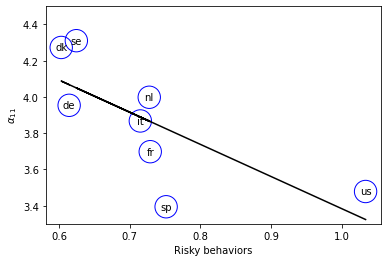

In [21]:
plt.figure()
plt.scatter(IndexThep,pars.loc['delta_h2',:],facecolors='none', edgecolors='b',s=500.0)
#sns.regplot(IndexThep,pars.loc['d2',:], color='none', marker=" ")#color ='blue', marker="o", label=countries)
plt.plot(Index_Thep.loc['IndexThep',:], intercept + slope*Index_Thep.loc['IndexThep',:], 'k')
plt.ylim(3.3,4.5)
plt.ylabel('$\\alpha_{11}$')
plt.xlabel('Risky behaviors')
for x,y,z in zip(IndexThep,pars.loc['delta_h2',:],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')
plt.savefig('../figures/fig3_a11.eps')

# $\alpha_{10}$ Transition for bad to good health

In [22]:
name_I  = ['tete']
Index_I = pd.DataFrame(index=name_I,columns=countries)
Index_I.loc['tete',:] = 70/(1-(tables_s.loc['Smoking',:]+tables_s.loc['Obesity',:]+tables_s.loc['Drug',:]+tables_s.loc['Phys. Act.',:])) - 70
Index_I

,de,dk,fr,it,nl,se,sp,us
tete,6.036014,6.294224,4.120758,4.912009,5.415615,4.737692,4.137542,6.868274


In [23]:
tete = [Index_I.loc['tete','de'],Index_I.loc['tete','dk'], Index_I.loc['tete','fr'], Index_I.loc['tete','it'], Index_I.loc['tete','nl'], Index_I.loc['tete','se'], Index_I.loc['tete','sp'],Index_I.loc['tete','us']]
tete

[6.036014239882363,
 6.294224160922397,
 4.120757790522347,
 4.912009173551752,
 5.415614732482055,
 4.737691699430215,
 4.137542103793464,
 6.868274020107464]

In [24]:
pars.loc['delta_h1',:]

de   -1.296156
dk   -1.601068
fr   -1.094451
it   -0.715889
nl   -1.264525
se   -1.525023
sp   -0.005673
us   -0.967380
Name: delta_h1, dtype: float64

In [25]:
slope, intercept, r_value, p_value, std_err = stats.linregress(tete,pars.loc['delta_h1',:])
print("slope: %f    intercept: %f   R-squared: %f" % (slope, intercept,r_value**2))

slope: -0.228481    intercept: 0.155666   R-squared: 0.203848


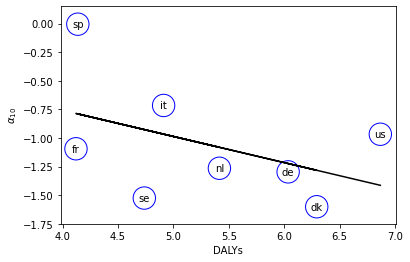

In [26]:
plt.figure()
plt.scatter(tete,pars.loc['delta_h1',:],facecolors='none', edgecolors='b',s=500.0)
plt.plot(Index_I.loc['tete',:], intercept + slope*Index_I.loc['tete',:], 'k')
plt.ylabel('$\\alpha_{10}$')
plt.xlabel('DALYs')
plt.ylim(-1.75,0.15)
for x,y,z in zip(tete,pars.loc['delta_h1',:],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')
plt.savefig('../figures/fig3_a10.png',dpi=600)

<ipython-input-27-13d42dc01a83>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(countries_plot)


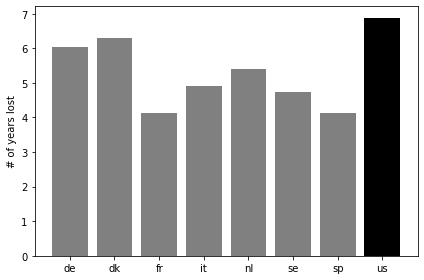

In [27]:
x = np.arange(len(countries))
fig, ax = plt.subplots()
clrs = ['grey' if xi < 7 else 'black' for xi in x ]
ax.bar(x,tete,color=clrs)#'grey')#label='Total')
ax.set_ylabel('# of years lost')
ax.set_xticklabels(countries_plot)
fig.tight_layout()
plt.savefig('../figures/fig_c2_DALYs.eps')
plt.show()

In [28]:
print("from bad to good / DALYs withoy diet")
res01_spear_rho, res01_spear_pv = spearmanr(tete[0:8], pars.loc['delta_h1',['de','dk','fr','it','nl','se','sp','us']])
print([res01_spear_rho, res01_spear_pv])

print("from good to good / Continuous Index")
mm = np.array(IndexThep)
mm = mm[[0,1,2,3,4,5,6,7]]
res02_spear_rho, res02_spear_pv = spearmanr(mm, pars.loc['delta_h2',['de','dk','fr','it','nl','se','sp','us']])
print([res02_spear_rho, res02_spear_pv])


from bad to good / DALYs withoy diet
[-0.3333333333333334, 0.4197530864197531]
from good to good / Continuous Index
[-0.8095238095238096, 0.014902667686230067]
